In [13]:
import matplotlib.pyplot as plt
import pandas as pd

In [14]:
# load the data
df = pd.read_csv("netflix_dataset.csv")


In [15]:
# clean the data
df = df.dropna(subset=['show_id','type','title','director','cast','country','date_added','release_year','rating','duration','listed_in','description'])


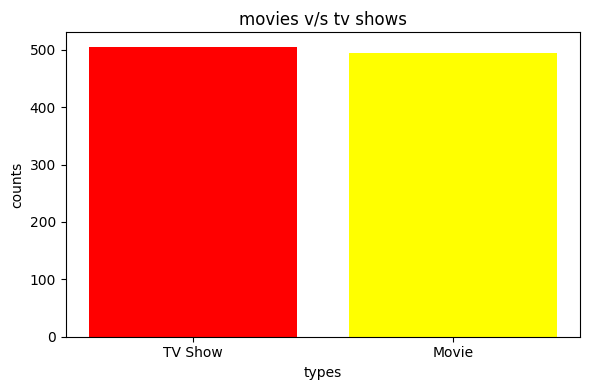

In [20]:
# plot the bar chart
type_count = df['type'].value_counts()
plt.figure(figsize=(6, 4))
plt.bar(type_count.index, type_count.values, color=['red','yellow'])
plt.xlabel('types')
plt.ylabel('counts')
plt.title('movies v/s tv shows')
plt.tight_layout()
plt.savefig('movies_vs_tv_shows.png', dpi=300, bbox_inches='tight')
plt.show()

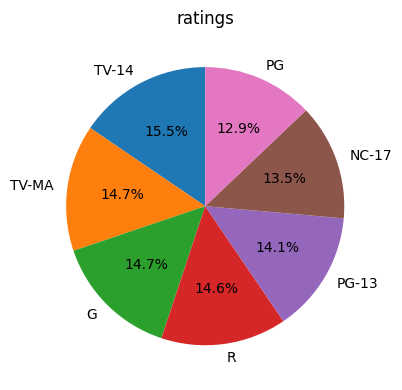

In [23]:
# plot the pie chart

rating = df['rating'].value_counts()
plt.figure(figsize=(8, 4))
plt.pie(rating, labels=rating.index, autopct='%1.1f%%', startangle=90)
plt.title('ratings')
plt.tight_layout()
plt.savefig('ratings.png', dpi=300, bbox_inches='tight')
plt.show()

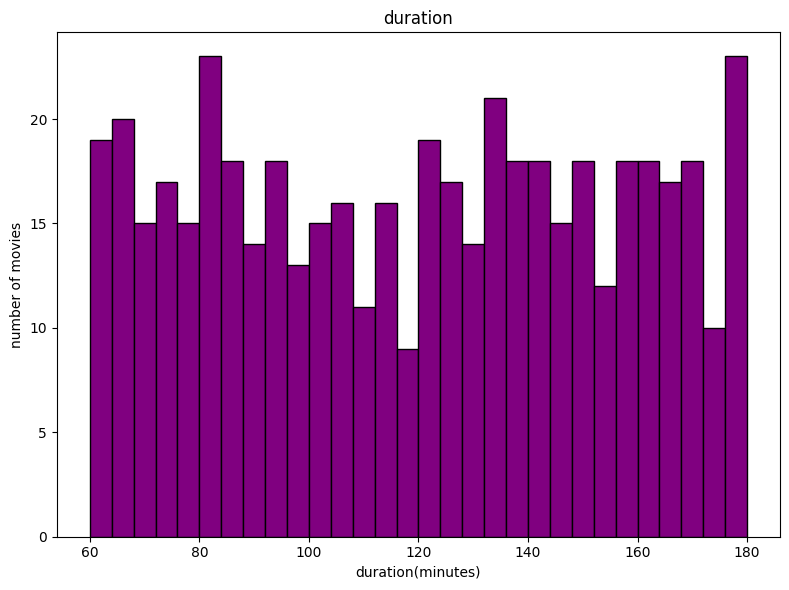

In [25]:
# histogram of movie duration
movie_df = df[df['type']=='Movie'].copy()
movie_df['duration_int'] = movie_df['duration'].str.replace(' min','').astype(int)

plt.figure(figsize=(8, 6))
plt.hist(movie_df['duration_int'], bins=30, color='purple', edgecolor='black')
plt.title('duration')
plt.xlabel('duration(minutes)')
plt.ylabel('number of movies')
plt.tight_layout()
plt.savefig('durations.png', dpi=300, bbox_inches='tight')
plt.show()

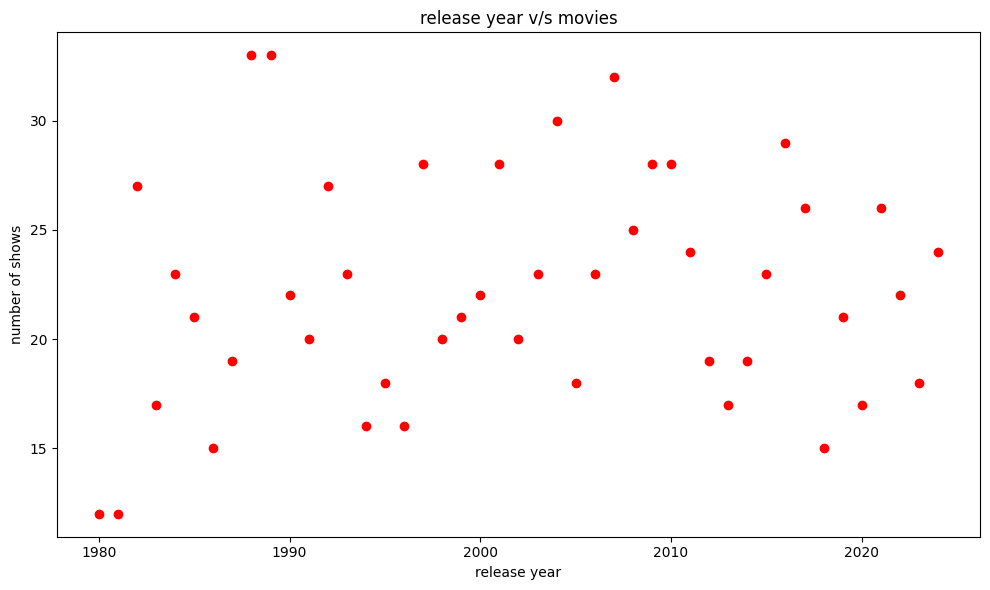

In [27]:
# release year of shows

release_counts = df['release_year'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
plt.scatter(release_counts.index, release_counts.values, color='red')
plt.title('release year v/s movies')
plt.xlabel('release year')
plt.ylabel('number of shows')
plt.tight_layout()
plt.savefig('release_year.png', dpi=300, bbox_inches='tight')
plt.show()

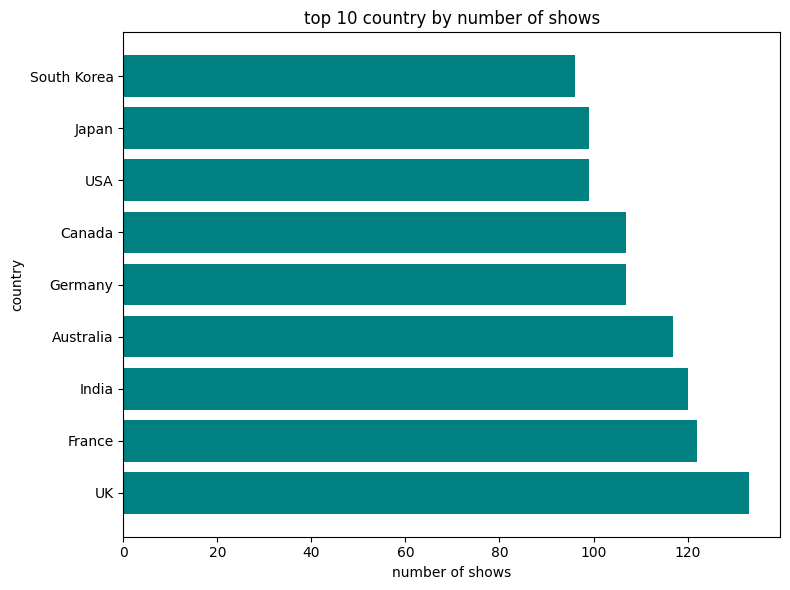

In [28]:
# top 10 country by movies
country_counts = df['country'].value_counts().head(10)
plt.figure(figsize=(8, 6))
plt.barh(country_counts.index, country_counts.values, color='teal')
plt.title('top 10 country by number of shows')
plt.xlabel('number of shows')
plt.ylabel('country')
plt.tight_layout()
plt.savefig('top10_countries.png', dpi=300, bbox_inches='tight')
plt.show()

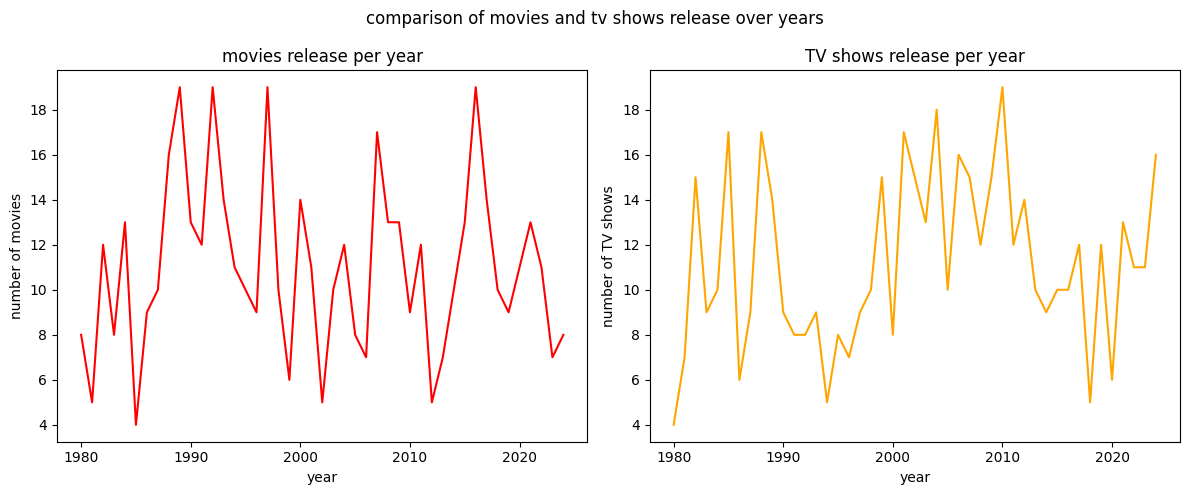

In [31]:
# group by release_year and type and making subplots of them

content_by_year = df.groupby(['release_year','type']).size().unstack().fillna(0)

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# first subplots for movies
ax[0].plot(content_by_year.index, content_by_year['Movie'], color='red')
ax[0].set_title('movies release per year')
ax[0].set_xlabel('year')
ax[0].set_ylabel('number of movies')

# second subplots for TV shows
ax[1].plot(content_by_year.index, content_by_year['TV Show'], color='orange')
ax[1].set_title('TV shows release per year')
ax[1].set_xlabel('year')
ax[1].set_ylabel('number of TV shows')

fig.suptitle("comparison of movies and tv shows release over years")

plt.tight_layout()
fig.savefig("movies_vs_shows_per_year.png", dpi=300)
plt.show()